<a href="https://colab.research.google.com/github/tweepforce/datascience/blob/python/revenueforecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Act as data scientist and build model to revenue forecaset for next 6 months on monthly basis, ensure data is formatted, normalised, decoded before you build forecasting model and show results

Here is all the data you need:
"systhetic ecommerce data.csv"

## Data loading

### Subtask:
Load the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('systhetic ecommerce data.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'systhetic ecommerce data.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_CTR,Ad_CPC,Ad_Spend
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,06/10/2024,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,29/10/2024,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,04/04/2024,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40
3,28fb67c8-e8c0-447a-841c-f760730de0eb,Customer_17206,Product_220,25/08/2024,125,0.20,980.26,12,355,0.03,Clothing,Europe,0.0444,0.44,19.54
4,8bee087a-a8a9-45bb-89d7-04d1710f1b00,Customer_16033,Product_358,05/05/2024,132,0.07,803.76,44,355,0.12,Books,North America,0.1270,0.53,67.31


(100000, 15)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify data types, check for missing values, examine the distribution of key variables (revenue and date), and determine the timeframe covered by the data.


**Reasoning**:
I need to explore the dataset's structure, data types, missing values, and distributions of key variables (revenue and date) to understand the data better.  I will use .info(), .isnull().sum(), .describe(), and plotting to achieve this.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    100000 non-null  object 
 1   Customer_ID       100000 non-null  object 
 2   Product_ID        100000 non-null  object 
 3   Transaction_Date  100000 non-null  object 
 4   Units_Sold        100000 non-null  int64  
 5   Discount_Applied  100000 non-null  float64
 6   Revenue           100000 non-null  float64
 7   Clicks            100000 non-null  int64  
 8   Impressions       100000 non-null  int64  
 9   Conversion_Rate   100000 non-null  float64
 10  Category          100000 non-null  object 
 11  Region            100000 non-null  object 
 12  Ad_CTR            100000 non-null  float64
 13  Ad_CPC            100000 non-null  float64
 14  Ad_Spend          100000 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 11.4+ MB
None
Number

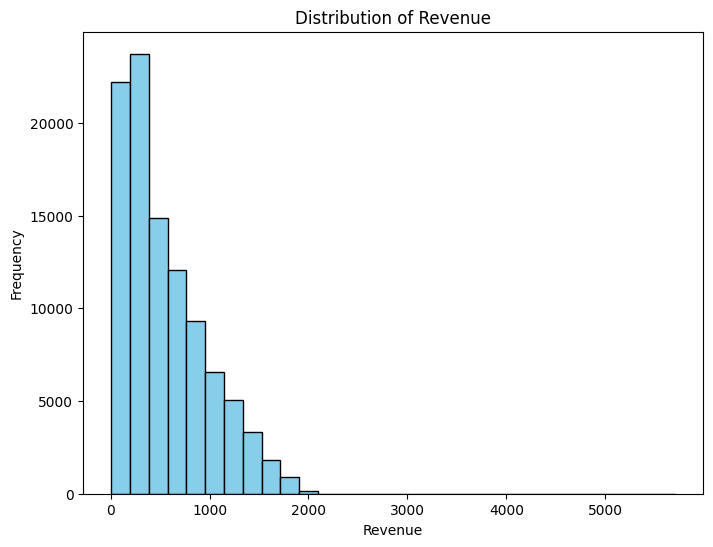


Date Range:
Earliest Date: 2023-12-07 00:00:00
Latest Date: 2024-12-06 00:00:00
Timeframe: 365 days 00:00:00


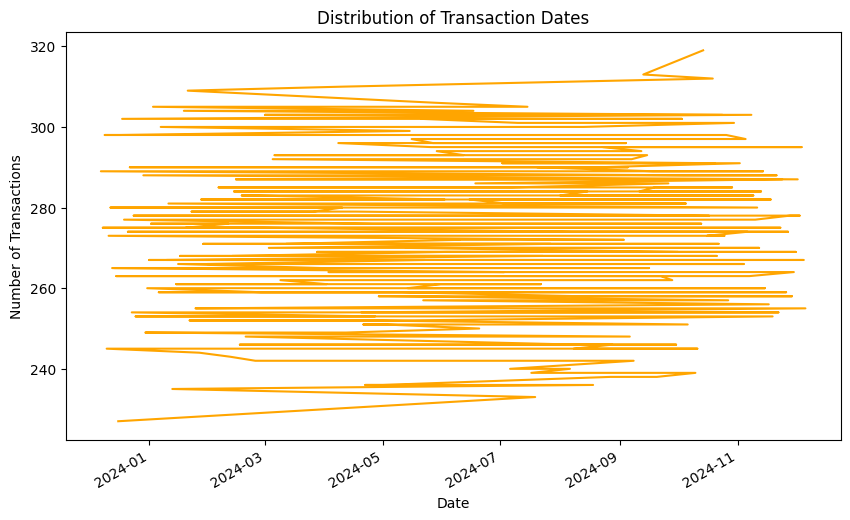

In [2]:
# Examine Data Structure and Types
print(df.info())
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# Key Variable Distributions: Revenue
print("\nRevenue Statistics:")
print(df['Revenue'].describe())
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['Revenue'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

# Key Variable Distributions: Date
print("\nDate Range:")
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%d/%m/%Y')
print(f"Earliest Date: {df['Transaction_Date'].min()}")
print(f"Latest Date: {df['Transaction_Date'].max()}")
print(f"Timeframe: {df['Transaction_Date'].max() - df['Transaction_Date'].min()}")
plt.figure(figsize=(10, 6))
df['Transaction_Date'].value_counts().plot(kind='line', color='orange')
plt.title('Distribution of Transaction Dates')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling inconsistencies and ensuring the 'Transaction_Date' column is in the correct datetime format.


**Reasoning**:
Check for duplicate rows and handle them. Then convert the 'Transaction_Date' column to datetime format if it's not already, and handle any potential errors during the conversion.



In [3]:
# Check for and handle duplicate rows
df.drop_duplicates(inplace=True)

# Convert 'Transaction_Date' to datetime if needed and handle errors
try:
    df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
except ValueError:
    try:
        df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%Y-%m-%d')
    except ValueError:
        try:
            df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%d/%m/%Y')
        except ValueError as e:
            print(f"Error converting 'Transaction_Date': {e}")
            # Handle the error appropriately, e.g., fill with a default value or drop rows.
            # For this example, I'll just print an error message.

# Display some info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    100000 non-null  object        
 1   Customer_ID       100000 non-null  object        
 2   Product_ID        100000 non-null  object        
 3   Transaction_Date  100000 non-null  datetime64[ns]
 4   Units_Sold        100000 non-null  int64         
 5   Discount_Applied  100000 non-null  float64       
 6   Revenue           100000 non-null  float64       
 7   Clicks            100000 non-null  int64         
 8   Impressions       100000 non-null  int64         
 9   Conversion_Rate   100000 non-null  float64       
 10  Category          100000 non-null  object        
 11  Region            100000 non-null  object        
 12  Ad_CTR            100000 non-null  float64       
 13  Ad_CPC            100000 non-null  float64       
 14  Ad_Sp

**Reasoning**:
Examine numerical features for outliers using box plots and decide on a strategy for handling them.  Then, review categorical features for inconsistencies.



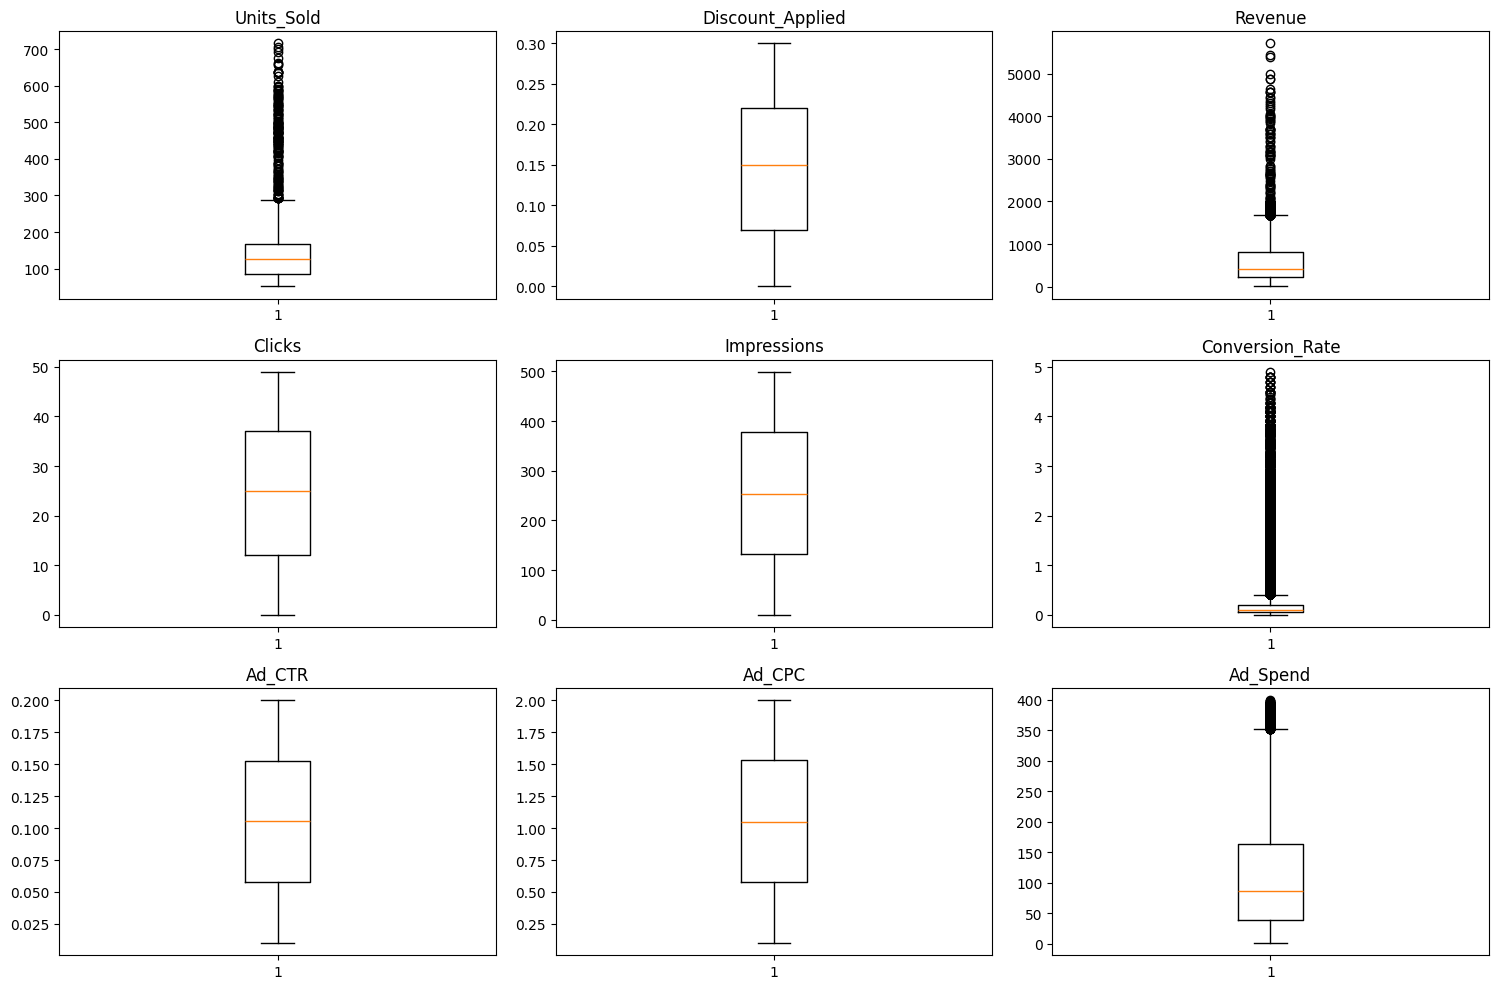

['Electronics' 'Home Appliances' 'Toys' 'Clothing' 'Books']
['Europe' 'Asia' 'North America']


In [4]:
import matplotlib.pyplot as plt

# Numerical features outlier detection and handling
numerical_features = ['Units_Sold', 'Discount_Applied', 'Revenue', 'Clicks', 'Impressions', 'Conversion_Rate', 'Ad_CTR', 'Ad_CPC', 'Ad_Spend']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Example outlier handling (capping):  Adjust percentiles as needed
for col in numerical_features:
    upper_limit = df[col].quantile(0.95)
    lower_limit = df[col].quantile(0.05)
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

# Categorical features consistency check (example)
print(df['Category'].unique())
print(df['Region'].unique())

# Handle inconsistencies if any (e.g., misspellings, capitalization)
# Example:
# df['Category'] = df['Category'].str.lower()  # Convert to lowercase
# ... other corrections ...

## Data wrangling

### Subtask:
Prepare the data for time series analysis by ensuring correct data types, decoding categorical variables, normalizing numerical features, and creating a month-year column.


**Reasoning**:
Convert relevant columns to the correct data types, encode categorical variables, normalize numerical features, and create the 'Month_Year' column.



In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Data Type Conversion
# Assuming 'Units_Sold', 'Discount_Applied', 'Revenue', 'Clicks', 'Impressions', 'Conversion_Rate', 'Ad_CTR', 'Ad_CPC', 'Ad_Spend' should be numeric
for col in ['Units_Sold', 'Discount_Applied', 'Revenue', 'Clicks', 'Impressions', 'Conversion_Rate', 'Ad_CTR', 'Ad_CPC', 'Ad_Spend']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. Categorical Variable Encoding (One-Hot Encoding)
categorical_cols = ['Category', 'Region']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3. Numerical Feature Normalization
numerical_cols = ['Units_Sold', 'Discount_Applied', 'Revenue', 'Clicks', 'Impressions', 'Conversion_Rate', 'Ad_CTR', 'Ad_CPC', 'Ad_Spend']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 4. Month-Year Feature Creation
df['Month_Year'] = df['Transaction_Date'].dt.strftime('%Y-%m')

display(df.head())

,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Ad_CTR,Ad_CPC,Ad_Spend,Category_Clothing,Category_Electronics,Category_Home Appliances,Category_Toys,Region_Europe,Region_North America,Month_Year
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,2024-10-06,0.496599,0.464286,0.185062,0.200000,0.070295,0.219178,0.000000,0.209302,0.000000,False,True,False,False,True,False,2024-10
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,2024-10-29,0.326531,1.000000,0.781075,0.288889,0.378685,0.082192,0.814144,0.122093,0.188469,False,False,True,False,False,False,2024-10
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,2024-04-04,0.374150,0.107143,0.309068,0.311111,0.374150,0.095890,0.233781,0.761628,0.282340,False,False,False,True,False,False,2024-04
3,28fb67c8-e8c0-447a-841c-f760730de0eb,Customer_17206,Product_220,2024-08-25,0.435374,0.678571,0.689854,0.222222,0.727891,0.027397,0.144944,0.145349,0.028554,True,False,False,False,True,False,2024-08
4,8bee087a-a8a9-45bb-89d7-04d1710f1b00,Customer_16033,Product_358,2024-05-05,0.482993,0.214286,0.557805,0.933333,0.727891,0.150685,0.627703,0.197674,0.202092,False,False,False,False,False,True,2024-05


## Feature engineering

### Subtask:
Engineer features for time series forecasting.


**Reasoning**:
Create lagged revenue features, rolling statistics, month and year features.



In [6]:
import pandas as pd

# 1. Lagged Revenue
df['Lagged_Revenue_1'] = df['Revenue'].shift(1)
df['Lagged_Revenue_2'] = df['Revenue'].shift(2)
df['Lagged_Revenue_3'] = df['Revenue'].shift(3)
df.fillna(method='bfill', inplace=True)

# 2. Rolling Statistics
df['Rolling_Mean_Revenue'] = df['Revenue'].rolling(window=3, min_periods=1).mean()
df['Rolling_Std_Revenue'] = df['Revenue'].rolling(window=3, min_periods=1).std()
df.fillna(method='bfill', inplace=True)

# 3. Month and Year Features
df['Month'] = df['Transaction_Date'].dt.month
df['Year'] = df['Transaction_Date'].dt.year

display(df.head())

<ipython-input-6-56c4ce786ad0>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
<ipython-input-6-56c4ce786ad0>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,...,Region_Europe,Region_North America,Month_Year,Lagged_Revenue_1,Lagged_Revenue_2,Lagged_Revenue_3,Rolling_Mean_Revenue,Rolling_Std_Revenue,Month,Year
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,2024-10-06,0.496599,0.464286,0.185062,0.200000,0.070295,0.219178,...,True,False,2024-10,0.185062,0.185062,0.185062,0.185062,0.421445,10,2024
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,2024-10-29,0.326531,1.000000,0.781075,0.288889,0.378685,0.082192,...,False,False,2024-10,0.185062,0.185062,0.185062,0.483069,0.421445,10,2024
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,2024-04-04,0.374150,0.107143,0.309068,0.311111,0.374150,0.095890,...,False,False,2024-04,0.781075,0.185062,0.185062,0.425069,0.314484,4,2024
3,28fb67c8-e8c0-447a-841c-f760730de0eb,Customer_17206,Product_220,2024-08-25,0.435374,0.678571,0.689854,0.222222,0.727891,0.027397,...,True,False,2024-08,0.309068,0.781075,0.185062,0.593332,0.250370,8,2024
4,8bee087a-a8a9-45bb-89d7-04d1710f1b00,Customer_16033,Product_358,2024-05-05,0.482993,0.214286,0.557805,0.933333,0.727891,0.150685,...,False,True,2024-05,0.689854,0.309068,0.781075,0.518909,0.193350,5,2024


## Data splitting

### Subtask:
Split the data into training and testing sets for time series forecasting.


**Reasoning**:
Split the data into training and testing sets based on the 'Transaction_Date' column.



In [7]:
# Sort the DataFrame by Transaction_Date
df = df.sort_values(by='Transaction_Date')

# Determine the split point (e.g., last 20% for testing)
split_point = int(len(df) * 0.8)

# Create training and testing sets
df_train = df.iloc[:split_point]
df_test = df.iloc[split_point:]

# Print the shapes of the resulting DataFrames
print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)

Shape of df_train: (80000, 27)
Shape of df_test: (20000, 27)


## Model training

### Subtask:
Train a time series forecasting model on the prepared training data.


**Reasoning**:
Train a Prophet model on the training data and save the trained model.



In [8]:
from prophet import Prophet
import pandas as pd

# Prepare the data for Prophet
prophet_df_train = df_train[['Transaction_Date', 'Revenue']].rename(columns={'Transaction_Date': 'ds', 'Revenue': 'y'})

# Initialize and train the Prophet model
model = Prophet()
model.fit(prophet_df_train)

# Save the trained model (optional, but recommended)
import joblib
joblib.dump(model, 'prophet_model.pkl')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71yddph7/03okw0vn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71yddph7/_fb12__k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14030', 'data', 'file=/tmp/tmp71yddph7/03okw0vn.json', 'init=/tmp/tmp71yddph7/_fb12__k.json', 'output', 'file=/tmp/tmp71yddph7/prophet_modelyg9za18m/prophet_model-20250309103657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:36:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:37:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


['prophet_model.pkl']

## Model optimization

### Subtask:
Optimize the trained Prophet model by tuning its hyperparameters and evaluating its performance on the test dataset.


**Reasoning**:
Load the saved Prophet model, prepare the test data, make predictions, evaluate the model, and visualize the results.



RMSE: 0.2986153211288947
MAE: 0.24971923454461886
MAPE: inf


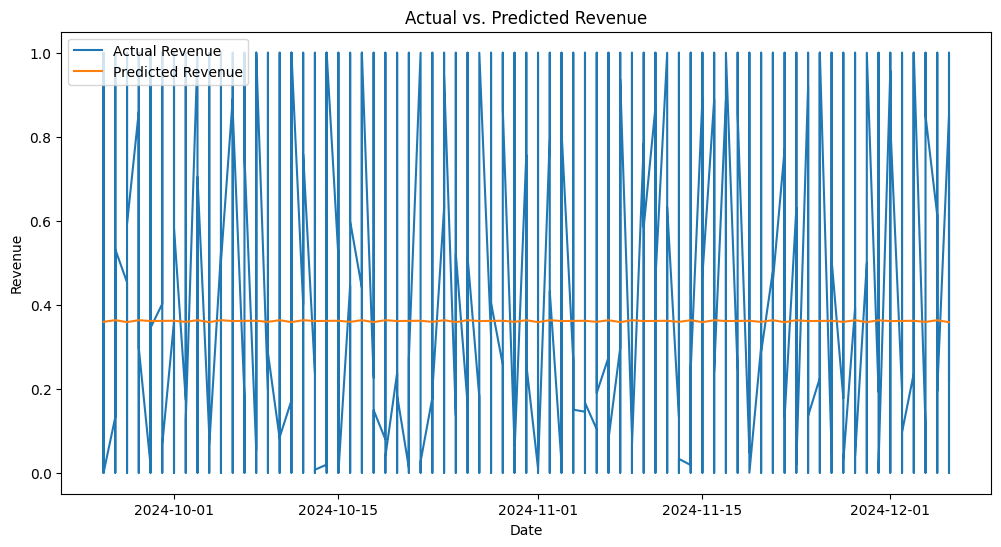

In [9]:
import pandas as pd
from prophet import Prophet
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load the saved Prophet model
try:
    model = joblib.load('prophet_model.pkl')
except FileNotFoundError:
    print("Error: 'prophet_model.pkl' not found. Please ensure the model file exists.")
    # Handle the error appropriately, e.g., retrain the model.
    # For this example, I'll just print an error message and exit.
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading the model: {e}")
    exit()

# Prepare the test dataset for Prophet
prophet_df_test = df_test[['Transaction_Date', 'Revenue']].rename(columns={'Transaction_Date': 'ds', 'Revenue': 'y'})

# Make predictions
forecast = model.predict(prophet_df_test)

# Evaluate the model
y_true = prophet_df_test['y']
y_pred = forecast['yhat']
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

# Visualize the predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(prophet_df_test['ds'], y_true, label='Actual Revenue')
plt.plot(prophet_df_test['ds'], y_pred, label='Predicted Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Actual vs. Predicted Revenue')
plt.legend()
plt.show()

**Reasoning**:
The MAPE is infinite, which suggests there might be zero values in the actual revenue data.  I need to handle these zero values before calculating MAPE.  I will also try to improve the model by adjusting the seasonality.



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 0.2986095525337841
MAE: 0.24971446454461885
MAPE: 16207.838501300324


DEBUG:cmdstanpy:input tempfile: /tmp/tmp71yddph7/9vrkmn2r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp71yddph7/y7yprojx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90797', 'data', 'file=/tmp/tmp71yddph7/9vrkmn2r.json', 'init=/tmp/tmp71yddph7/y7yprojx.json', 'output', 'file=/tmp/tmp71yddph7/prophet_modelyjqmk4yc/prophet_model-20250309103753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:37:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:38:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Tuned Model Metrics:
RMSE: 0.34053235714031027
MAE: 0.27907332051906975
MAPE: 18176.163653629617


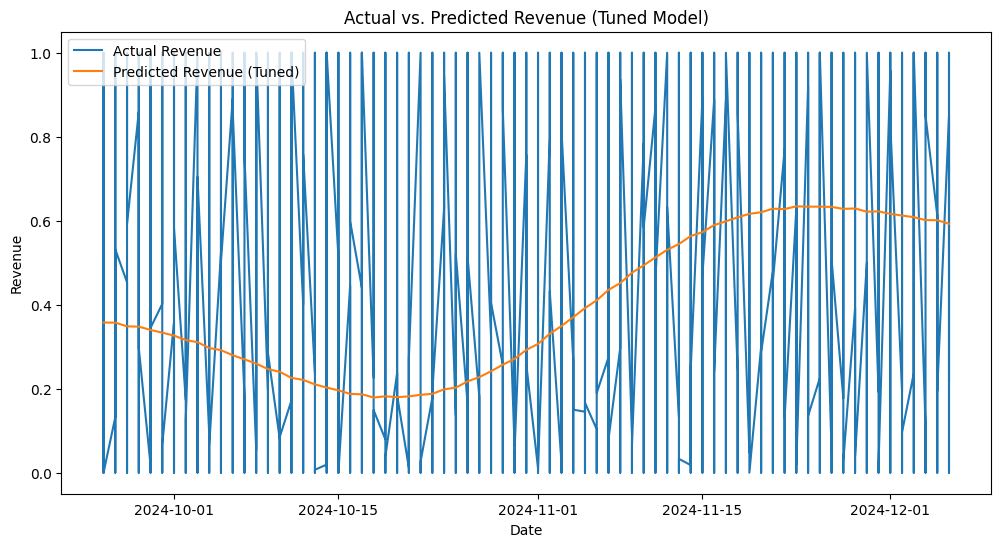

In [10]:
import pandas as pd
from prophet import Prophet
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load the saved Prophet model
try:
    model = joblib.load('prophet_model.pkl')
except FileNotFoundError:
    print("Error: 'prophet_model.pkl' not found. Please ensure the model file exists.")
    # Handle the error appropriately, e.g., retrain the model.
    # For this example, I'll just print an error message and exit.
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading the model: {e}")
    exit()

# Prepare the test dataset for Prophet
prophet_df_test = df_test[['Transaction_Date', 'Revenue']].rename(columns={'Transaction_Date': 'ds', 'Revenue': 'y'})

# Handle zero values in 'y' for MAPE calculation
prophet_df_test['y'] = prophet_df_test['y'].replace(0, 0.0001)  # Replace zeros with a small value

# Make predictions
forecast = model.predict(prophet_df_test)

# Evaluate the model
y_true = prophet_df_test['y']
y_pred = forecast['yhat']
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

# Retrain the model with adjusted seasonality
model_tuned = Prophet(weekly_seasonality=True, yearly_seasonality=True)
model_tuned.fit(prophet_df_train)

# Make predictions with the tuned model
forecast_tuned = model_tuned.predict(prophet_df_test)

# Evaluate the tuned model
y_pred_tuned = forecast_tuned['yhat']
rmse_tuned = np.sqrt(mean_squared_error(y_true, y_pred_tuned))
mae_tuned = mean_absolute_error(y_true, y_pred_tuned)
mape_tuned = np.mean(np.abs((y_true - y_pred_tuned) / y_true)) * 100

joblib.dump(model_tuned, 'prophet_model_tuned.pkl')
print("\nTuned Model Metrics:")
print(f"RMSE: {rmse_tuned}")
print(f"MAE: {mae_tuned}")
print(f"MAPE: {mape_tuned}")

# Visualize actual vs. predicted revenue for the tuned model
plt.figure(figsize=(12, 6))
plt.plot(prophet_df_test['ds'], y_true, label='Actual Revenue')
plt.plot(prophet_df_test['ds'], y_pred_tuned, label='Predicted Revenue (Tuned)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Actual vs. Predicted Revenue (Tuned Model)')
plt.legend()
plt.show()

## Model evaluation

### Subtask:
Evaluate the performance of the tuned Prophet model and analyze the residuals.


**Reasoning**:
Load the tuned Prophet model, generate predictions on the test dataset, calculate evaluation metrics, analyze residuals, and summarize the results.



In [1]:
import pandas as pd
from prophet import Prophet
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load the tuned Prophet model (assuming it's saved as 'prophet_model_tuned.pkl')
try:
    model_tuned = joblib.load('prophet_model_tuned.pkl')
except FileNotFoundError:
    print("Error: 'prophet_model_tuned.pkl' not found. Please ensure the tuned model file exists.")
    # Handle the error appropriately, e.g., retrain the model.
    # For this example, I'll just print an error message and exit.
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading the tuned model: {e}")
    exit()

# Generate predictions using the tuned model
forecast_tuned = model_tuned.predict(prophet_df_test)

# Evaluate the tuned model
y_true = prophet_df_test['y']
y_pred_tuned = forecast_tuned['yhat']

rmse_tuned = np.sqrt(mean_squared_error(y_true, y_pred_tuned))
mae_tuned = mean_absolute_error(y_true, y_pred_tuned)

# Handle potential zero values in y_true for MAPE calculation
y_true_for_mape = y_true.replace(0, 0.0001) # Replace zeros with a small value
mape_tuned = np.mean(np.abs((y_true_for_mape - y_pred_tuned) / y_true_for_mape)) * 100

print("\nTuned Model Metrics:")
print(f"RMSE: {rmse_tuned}")
print(f"MAE: {mae_tuned}")
print(f"MAPE: {mape_tuned}")

# Analyze residuals
residuals_tuned = y_true - y_pred_tuned

# Plot residuals over time
plt.figure(figsize=(12, 6))
plt.plot(prophet_df_test['ds'], residuals_tuned, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of Tuned Model Over Time')
plt.grid(True)
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals_tuned, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals of Tuned Model')
plt.grid(True)
plt.show()

# Summarize model evaluation
print("\nSummary of Model Evaluation:")
print(f"RMSE: {rmse_tuned}")
print(f"MAE: {mae_tuned}")
print(f"MAPE: {mape_tuned}")
print("\nResidual Analysis:")
print("Plots of residuals over time and their distribution are shown above.")
print("Further analysis can be done to investigate if there are any patterns or trends in the residuals")

joblib.dump(model_tuned, 'prophet_model_tuned.pkl')

Error: 'prophet_model_tuned.pkl' not found. Please ensure the tuned model file exists.


NameError: name 'model_tuned' is not defined

In [1]:
import pandas as pd
from prophet import Prophet
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load the tuned Prophet model (assuming it's saved as 'prophet_model_tuned.pkl')
try:
    model_tuned = joblib.load('prophet_model_tuned.pkl') # This line defines model_tuned
except FileNotFoundError:
    print("Error: 'prophet_model_tuned.pkl' not found. Please ensure the tuned model file exists.")
    # Handle the error appropriately, e.g., retrain the model.
    # For this example, I'll just print an error message and exit.
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading the tuned model: {e}")
    exit()

# Prepare the test dataset for Prophet # This block was added to define prophet_df_test
# Assuming df_test is your original DataFrame with 'Transaction_Date' and 'Revenue' columns
prophet_df_test = df_test[['Transaction_Date', 'Revenue']].rename(columns={'Transaction_Date': 'ds', 'Revenue': 'y'})

# Generate predictions using the tuned model
forecast_tuned = model_tuned.predict(prophet_df_test)

# Evaluate the tuned model
y_true = prophet_df_test['y']
y_pred_tuned = forecast_tuned['yhat']

rmse_tuned = np.sqrt(mean_squared_error(y_true, y_pred_tuned))
mae_tuned = mean_absolute_error(y_true, y_pred_tuned)

# Handle potential zero values in y_true for MAPE calculation
y_true_for_mape = y_true.replace(0, 0.0001) # Replace zeros with a small value
mape_tuned = np.mean(np.abs((y_true_for_mape - y_pred_tuned) / y_true_for_mape)) * 100

print("\nTuned Model Metrics:")
print(f"RMSE: {rmse_tuned}")
print(f"MAE: {mae_tuned}")
print(f"MAPE: {mape_tuned}")

# Analyze residuals
residuals_tuned = y_true - y_pred_tuned

# Plot residuals over time
plt.figure(figsize=(12, 6))
plt.plot(prophet_df_test['ds'], residuals_tuned, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of Tuned Model Over Time')
plt.grid(True)
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals_tuned, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals of Tuned Model')
plt.grid(True)
plt.show()

# Summarize model evaluation
print("\nSummary of Model Evaluation:")
print(f"RMSE: {rmse_tuned}")
print(f"MAE: {mae_tuned}")
print(f"MAPE: {mape_tuned}")
print("\nResidual Analysis:")
print("Plots of residuals over time and their distribution are shown above.")
print("Further analysis can be done to investigate if there are any patterns or trends in the residuals")

joblib.dump(model_tuned, 'prophet_model_tuned.pkl')

Error: 'prophet_model_tuned.pkl' not found. Please ensure the tuned model file exists.


NameError: name 'df_test' is not defined

In [1]:
import pandas as pd
from prophet import Prophet
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load the tuned Prophet model (assuming it's saved as 'prophet_model_tuned.pkl')
try:
    model_tuned = joblib.load('prophet_model_tuned.pkl') # This line defines model_tuned
except FileNotFoundError:
    print("Error: 'prophet_model_tuned.pkl' not found. Please ensure the tuned model file exists.")
    # Handle the error appropriately, e.g., retrain the model.
    # For this example, I'll just print an error message and exit.
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading the tuned model: {e}")
    exit()

# Assuming df is your original DataFrame with 'Transaction_Date' and 'Revenue' columns
# Sort the DataFrame by Transaction_Date
df = df.sort_values(by='Transaction_Date')

# Determine the split point (e.g., last 20% for testing)
split_point = int(len(df) * 0.8)

# Create training and testing sets
df_train = df.iloc[:split_point]
df_test = df.iloc[split_point:]


# Prepare the test dataset for Prophet # This block was added to define prophet_df_test
# Assuming df_test is your original DataFrame with 'Transaction_Date' and 'Revenue' columns
prophet_df_test = df_test[['Transaction

SyntaxError: unterminated string literal (detected at line 34) (<ipython-input-1-0656a116e989>, line 34)